# 딥러닝 (3)
## 오차제곱합
모델이 예측한 값과 실제 값이 얼마나 차이 나는지(이것을 '오차'라고 해요) 측정합니다. 이 오차들을 '제곱'해서 모두 더한 값이 바로 오차제곱합(SSE) 입니다. SSE 값이 작을수록 모델이 예측을 더 잘한다고 볼 수 있습니다.

In [109]:
import numpy as np
# 실제 시험 점수 (우리가 이미 알고 있는 정답 값)
actual_scores = np.array([60, 75, 80, 85, 95])

In [2]:
# 모델이 예측한 시험 점수
predicted_scores = np.array([55, 78, 75, 88, 92])

In [3]:
# 1단계: 각 학생별 오차 계산 (실제 값 - 예측 값)
errors = actual_scores - predicted_scores
print(f"각 학생별 오차: {errors}")

각 학생별 오차: [ 5 -3  5 -3  3]


In [4]:
# 2단계: 각 오차를 제곱
squared_errors = errors ** 2
# 또는 squared_errors = np.square(errors) 와 같이 계산해도 됩니다.
print(f"각 오차의 제곱: {squared_errors}")

각 오차의 제곱: [25  9 25  9  9]


In [5]:
# 3단계: 제곱된 오차들을 모두 합하기 (SSE 계산)
sse = np.sum(squared_errors)
print(f"오차제곱합 (SSE): {sse}")

오차제곱합 (SSE): 77


In [6]:
def sum_squares_error(p, r):
    return np.sum((p - r) ** 2)

In [7]:
import numpy as np
real = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
pred = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])

In [8]:
sum_squares_error(pred, real)

0.19500000000000006

In [9]:
real = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
pred = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])

In [10]:
sum_squares_error(pred, real)

1.3949999999999998

## 교차 엔트로피 오차
교차 엔트로피 오차는 주로 ```카테고리(범주)```를 맞추는 분류 문제에 사용됩니다. 모델이 예측한 확률 분포와 실제 정답의 확률 분포가 얼마나 다른지를 측정합니다. 모델이 틀린 답을 높은 확률로 예측할수록 오차(벌점)를 크게 주고, 맞는 답을 높은 확률로 예측할수록 오차를 작게 줍니다.

In [17]:
import numpy as np

real = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])          # 정답은 2
# real = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])   # 정답 3이라고 조작하고 보면 오차 커지는 것 확인 가능
pred = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])     # 0일확률이 0.1, 1일확률이 0.05, ...

-sum(real * np.log(pred + 1e-7))      # log0은 불가능하므로 아주 작은값을 더해줌
# real을 곱해주면 컴퓨터가 정답이라고 예측한 부분만 도드라짐

0.510825457099338

In [18]:
def cross_entropy_error(y, t):
    delta = 1e-9
    if y.ndim == 1:
        t = t.reshape(-1, t.size)
        y = y.reshape(-1, y.size)
    size = len(t)
    return -np.sum(np.log(y[np.arange(size), t] + delta)) / size

In [27]:
import numpy as np

real = np.array([3,2, 0])      # 원핫인코딩으로 안돼있고 정답이3, 정답이2 이런식으로 그냥 나와있는경우
pred = np.array([[0.1, 0.2, 0.3, 0.4],
                 [0.1, 0.2, 0.7, 0.1],
                 [0.5, 0.1, 0.1, 0.3]])

length = len(pred)

-sum(np.log(pred[np.arange(length), real] + 1e-7)) / length     # pred의 0,1,2행에 대해 real값을 가져와라
# 원핫인코딩으로 안되어있는경우, cross entropy 이용하여 총 오차 평균 구한다

0.6553707545052504

## 편미분 (Partial Derivative)
편미분은 함수에 입력 변수가 여러 개 있을 때 사용합니다. 여러 입력 변수 중 딱 하나만 변수 취급하고, 나머지 변수들은 숫자(상수)처럼 고정시킨 상태에서 미분합니다. 즉, 특정 변수의 아주 작은 변화가 함수의 결과값을 얼마나 변화시키는지 보는 것입니다.

In [28]:
def numerical_diff(f, x):
    h = 1e-9
    return (f(x+h) - f(x-h)) / (2 * h)      # 미분공식

In [29]:
def func1(x):
    return x ** 2

In [31]:
numerical_diff(func1, 2)      # 이 함수를 2에 대해 미분해라 => 4

4.000000330961484

In [32]:
import matplotlib.pyplot as plt

In [54]:
def func2(x):
    return x[0] ** 2 + x[1] ** 2

def numerical_gradient(f, x):          # 여러개값을 따로따로 미분해주는 함수 (1차원)
    h = 1e-7
    grad = np.zeros_like(x)
    
    # 4개 들어있는 걸 하나하나 미분
    for idx in np.ndindex(x.shape):     # (0,0), (0,1), (1,0), (1,1)에 차례로 접근
        tmp = x[idx]

        x[idx] = tmp + h       # 0번째만 살짝 h만큼 더해서 저장
        f1 = f(x)          # 그때의 함수값도 찾아놓는다

        x[idx] = tmp - h 
        f2 = f(x)

        grad[idx] = (f1 - f2) / (2*h)
        x[idx] = tmp
        
    return grad        # for문이 끝나면 기울기값만 return

In [56]:
a = np.array([3,4])
numerical_gradient(func2, a)

array([25000000, 35000000])

## 딥러닝 구현하기

In [58]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    if x.ndim == 1:            # 1차원일때 확률값으로 구하는 법
        c = np.max(x)
        exp_a = np.exp(x-c)
        sum_exp_a = np.sum(exp_a)
        y = exp_a / sum_exp_a
        return y
    elif x.ndim == 2:            # 2차원일때 확률값으로 구하는 법
        c = np.max(x, axis = 1).reshape(-1, 1)
        exp_a = np.exp(x - c)
        sum_exp_a = np.sum(exp_a, axis = 1).reshape(-1, 1)
        y = exp_a / sum_exp_a
        return y

In [70]:
class TwoLayerNet:
    
    # 가중치 초기화
    def __init__(self, I, H, O):       # 입력층의 노드개수, 은닉층의 노드개수, 출력층의 노드개수
        self.params = {}
        self.params["w1"] = np.random.randn(I, H)     # I행 H열만큼 
        self.params["b1"] = np.random.randn(H)        # 은닉층의 노드개수만큼 더해지게
        
        self.params["w2"] = np.random.randn(H, O)     # H행 O열만큼 
        self.params["b2"] = np.random.randn(O)
    
    # 예측함수
    def predict(self, x):       
        w1, w2 = self.params["w1"], self.params["w2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        a1 = x @ w1 + b1
        z1 = sigmoid(a1)
        a2 = z1 @ w2 + b2        # 출력층 값
        y = softmax(a2)       # 분류모델이니까 softmax로 
        return y

    # 오차 계산
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    # 정확도 구해줌
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)    # 컴퓨터가 정확히 몇으로 예측했는지 확인 가능
        t = np.argmax(t, axis = 1)   # 실제값도
        accuracy = sum(y == t) / len(y)     # 컴퓨터와 예측한 값과 실제값 비교해 몇 개 맞았는지
        return accuracy

    # 미분해주는 함수
    def numerical_gradient(self, x, t):
        loss = lambda i : self.loss(x, t)
        grads = {}
        grads["w1"] = numerical_gradient(loss, self.params["w1"])    # loss함수에 대해 가중치 하나씩 꺼내서 미분해라
        grads["b1"] = numerical_gradient(loss, self.params["b1"])  
        grads["w2"] = numerical_gradient(loss, self.params["w2"]) 
        grads["b2"] = numerical_gradient(loss, self.params["b2"])  
        return grads

In [74]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tqdm import tqdm

iris = load_iris()

X = iris.data     # 문제집
Y = iris.target   # 정답지

train_x, test_x, train_y, test_y = train_test_split(X, Y)       # 훈련set, 시험set으로 나눠줌

net = TwoLayerNet(4, 8, 3)

loss_box = []
test_loss_box = []

for i in tqdm(range(10000)):
    mask = np.random.choice(len(train_x), 50)
    x_batch = train_x[mask]
    t_batch = train_y[mask]
    grad = net.numerical_gradient(x_batch, t_batch)

    for key in ("w1", "b1", "w2", "b2"):
        net.params[key] -= grad[key] * 0.1

    loss = net.loss(x_batch, t_batch)
    test_loss = net.loss(test_x, test_y)
    
    loss_box.append(loss)
    test_loss_box.append(test_loss)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 251.69it/s]


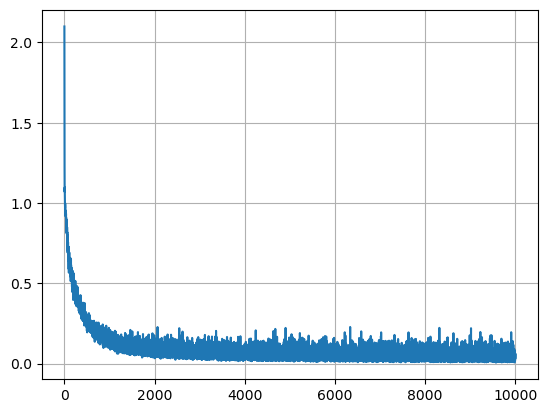

In [75]:
import matplotlib.pyplot as plt

plt.plot(loss_box)
plt.grid()
plt.show()

In [76]:
pred = net.predict(test_x)
pred

array([[3.48651834e-04, 1.79077964e-01, 8.20573384e-01],
       [1.61201409e-03, 9.97286595e-01, 1.10139113e-03],
       [7.12893148e-05, 3.31464675e-02, 9.66782243e-01],
       [9.95640781e-01, 4.31146795e-03, 4.77506526e-05],
       [1.50823723e-03, 9.95945221e-01, 2.54654139e-03],
       [5.64550899e-05, 2.65510307e-02, 9.73392514e-01],
       [3.44876151e-05, 1.57429912e-02, 9.84222521e-01],
       [1.66800850e-03, 9.96621726e-01, 1.71026535e-03],
       [9.94533429e-01, 5.40643842e-03, 6.01330053e-05],
       [1.71593422e-03, 9.97020246e-01, 1.26381984e-03],
       [3.33741168e-04, 1.71129940e-01, 8.28536318e-01],
       [1.24840832e-03, 7.04107007e-01, 2.94644584e-01],
       [1.27368670e-04, 6.17708756e-02, 9.38101756e-01],
       [1.45409649e-03, 9.95234204e-01, 3.31169922e-03],
       [9.98198108e-01, 1.77885316e-03, 2.30392050e-05],
       [9.98066734e-01, 1.90878897e-03, 2.44770075e-05],
       [9.97653414e-01, 2.31763612e-03, 2.89495153e-05],
       [3.12397602e-05, 1.42289

In [77]:
np.argmax(pred, axis = 1)

array([2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0], dtype=int64)

In [79]:
from sklearn.metrics import classification_report
report = classification_report(test_y, np.argmax(pred, axis = 1))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      1.00      0.80        10
           2       1.00      0.72      0.84        18

    accuracy                           0.87        38
   macro avg       0.89      0.91      0.88        38
weighted avg       0.91      0.87      0.87        38



## 연습문제
1. 오차제곱합 (SSE) 계산: 실제 값 배열 actual = np.array([10, 20, 30, 40])과 모델 예측 값 배열 predicted = np.array([12, 18, 33, 38])이 주어졌을 때, 넘파이(NumPy)를 사용하여 오차제곱합(SSE)을 계산하는 코드를 작성하세요.

In [116]:
import numpy as np

actual = np.array([10, 20, 30, 40])
predicted = np.array([12, 18, 33, 38])

errors = actual - predicted
np.sum(errors ** 2)
# sum_squares_error(predicted, actual)

21

2. 교차 엔트로피 오차 (CEE) 계산: 실제 정답 레이블(원-핫 인코딩) t = np.array([0, 1, 0])와 모델의 예측 확률 y = np.array([0.1, 0.8, 0.1])가 주어졌을 때, 넘파이를 사용하여 교차 엔트로피 오차(CEE)를 계산하는 코드를 작성하세요 (로그 계산 시 delta = 1e-7 사용).

In [84]:
t = np.array([0, 1, 0])
y = np.array([0.1, 0.8, 0.1])

-np.sum(np.log(y + 1e-7) * t)

0.22314342631421757

In [85]:
def cross_entropy_error(p, r):
    return -np.sum(r * np.log(p + 1e-7))

cross_entropy_error(y, t)

0.22314342631421757

3. 수치 미분 (Numerical Differentiation): 함수 f(x)=0.5x^2+2x+1 가 주어졌을 때, x=3 에서의 수치 미분 값을 구하는 코드를 작성하세요 (h=1e−4).

In [87]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

def func1(x):
    return 0.5 * x**2 + 2 * x + 1
    
numerical_diff(func1, 3)

5.0000000000149925

4. 기울기 (Gradient) 계산: 함수 f(x0,x1) = x0^2 + x1^3 이 주어졌을 때, 점 (x0=2,x1=3) 에서의 기울기(각 변수에 대한 편미분 벡터)를 numerical_gradient 함수를 사용하여 구하는 코드를 작성하세요.

In [89]:
def numerical_gradient(f, x):
    h = 1e-7
    grad = np.zeros_like(x)
    
    for idx in np.ndindex(x.shape):
        val = x[idx]
        x[idx] = val + h
        fxh1 = f(x)

        x[idx] = val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = val

    return grad

def func2(x):
    return x[0] ** 2 + x[1] ** 3 

a = np.array([2, 3])
numerical_gradient(func2, a)

array([15000000, 95000000])

5. fish.csv 파일로 생선을 분류하는 딥러닝 모델을 만들어보세요.

In [98]:
# cross entropy 수정
def cross_entropy_error(p, r):
    size = len(p)
    return -np.sum(np.log(p[np.arange(size), r] + 1e-7)) / size     # 예측값의 np.arange(size)만큼의 행의 r열 

In [119]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

df = pd.read_csv("Data/fish.csv")

X = df.drop("target", axis = 1).values
Y = df["target"].values

encoder = LabelEncoder()
Y = encoder.fit_transform(Y) 

train_x, test_x, train_y, test_y = train_test_split(X, Y)       # 훈련set, 시험set

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [121]:
net = TwoLayerNet(2, 4, 2)     # 입력층: 특성2개(length, weight) / 은닉층은 임의로 / 출력층: 클래스 2개(bream(돔), smelt(빙어))

loss_box = []
test_loss_box = []

for i in tqdm(range(10000)):
    mask = np.random.choice(len(train_x), 10)
    
    x_batch = train_scaled[mask]
    t_batch = train_y[mask]
    
    grad = net.numerical_gradient(x_batch, t_batch)

    for key in ("w1", "b1", "w2", "b2"):
        net.params[key] -= grad[key] * 0.1

    loss = net.loss(x_batch, t_batch)
    test_loss = net.loss(test_scaled, test_y)
    
    loss_box.append(loss)
    test_loss_box.append(test_loss)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:14<00:00, 704.15it/s]


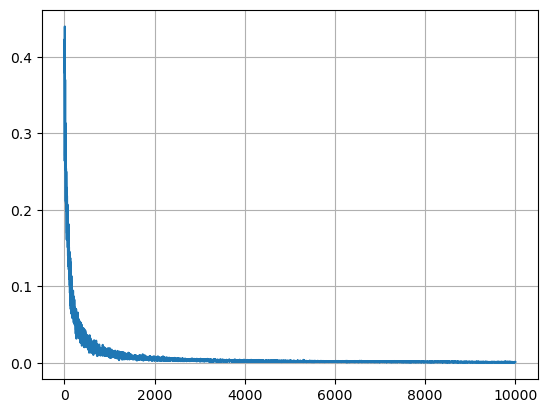

In [122]:
import matplotlib.pyplot as plt

plt.plot(loss_box)
plt.grid()
plt.show()

In [123]:
pred = np.argmax(net.predict(test_scaled), axis = 1)

from sklearn.metrics import classification_report
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



6. mnist.dat 파일을 활용해서 이미지 데이터를 분류하는 딥러닝 모델을 만들어보시고, 문제점을 찾아보세요.

In [128]:
import pickle
f = open("Data/mnist.dat", 'rb')
train, test = pickle.load(f)
f.close()

In [129]:
train_x, train_y = train
test_x, test_y = test

In [130]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [132]:
train_scaled = train_x.reshape(-1, 784) / 255      # 쭉늘려라
test_scaled = test_x.reshape(-1, 784) / 255

In [133]:
net = TwoLayerNet(784, 500, 10)

loss_box = []
test_loss_box = []

for i in tqdm(range(10000)):
    mask = np.random.choice(len(train_x), 1000)
    
    x_batch = train_scaled[mask]
    t_batch = train_y[mask]
    
    grad = net.numerical_gradient(x_batch, t_batch)

    for key in ("w1", "b1", "w2", "b2"):
        net.params[key] -= grad[key] * 0.1

    loss = net.loss(x_batch, t_batch)
    test_loss = net.loss(test_scaled, test_y)
    
    loss_box.append(loss)
    test_loss_box.append(test_loss)

# 가중치를 하나하나 꺼내서 미분해서 학습하는 방법은 너무 오래걸려서 0%에서 거의 멈춤  =>  오차역전파 사용해서 수정할 수 있다
# 오차역전파 : 신경망의 출력층에서 입력층 방향으로 미분을 효율적으로 계산하여 각 가중치에 대한 기울기(gradient)를 빠르게 구함

  0%|                                                                                        | 0/10000 [10:14<?, ?it/s]


KeyboardInterrupt: 